In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [80]:
reps = pd.read_csv('data/fivethirtyeight/rep_candidates.csv', encoding = 'ISO-8859-1')

In [81]:
reps.head()

,Candidate,Gender,Race 1,Race 2,Race 3,Incumbent,Incumbent Challenger,State,Primary Date,Office,...,2020 Election Stance,Trump,Trump Date,Club for Growth,Party Committee,Renew America,E-PAC,VIEW PAC,Maggie's List,Winning for Women
0,"Aditya ""A.D."" Atholi",Male,Asian (Indian),NaN,NaN,No,No,Texas,3/1/22,Representative,...,No comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Joe McDaniel,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Raised questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nathaniel Moran,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,Raised questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,John Porro,Male,White,NaN,NaN,No,No,Texas,3/1/22,Representative,...,No comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dan Crenshaw,Male,White,NaN,NaN,Yes,No,Texas,3/1/22,Representative,...,Accepted with reservations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
reps.columns

Index(['Candidate', 'Gender', 'Race 1', 'Race 2', 'Race 3', 'Incumbent',
       'Incumbent Challenger', 'State', 'Primary Date', 'Office', 'District',
       'Primary Votes', 'Primary %', 'Primary Outcome', 'Runoff Votes',
       'Runoff %', 'Runoff Outcome', '2020 Election Stance', 'Trump',
       'Trump Date', 'Club for Growth', 'Party Committee', 'Renew America',
       'E-PAC', 'VIEW PAC', 'Maggie's List', 'Winning for Women'],
      dtype='object')

In [83]:
reps['Runoff Outcome'] = reps['Runoff Outcome'].map({'Lost': 0, 'Won': 1, np.NaN: 0})
reps['Final Outcome'] = reps['Primary Outcome'].map({'Lost': 0, 'Made runoff': 0, 'Won': 1})
reps['Final Outcome'] = np.array(reps['Final Outcome']) + np.array(reps['Runoff Outcome'])
reps['Gender'] = reps['Gender'].map({'Male': 0, 'Female': 1})
reps['Incumbent'] = reps['Incumbent'].map({'Yes': 1, 'No': 0})

In [112]:
def election_eda(label):
    grouped = reps.groupby(['2020 Election Stance', label]).count().reset_index()
    grouped = grouped[['2020 Election Stance', label, 'Candidate']].rename(columns = {'Candidate': 'Count'})
    
    def density(row):
        if row[label] == 0:
            return row['Count'] / np.count_nonzero(reps[label] == 0)
        elif row[label] == 1:
            return row['Count'] / np.count_nonzero(reps[label] == 1)

    grouped['Proportion'] = grouped[[label, 'Count']].apply(density, axis = 1)
    return grouped

In [114]:
incumbents = election_eda('Incumbent')
incumbents

,2020 Election Stance,Incumbent,Count,Proportion
0,Accepted with reservations,0,54,0.039046
1,Accepted with reservations,1,50,0.231481
2,Avoided answering,0,51,0.036876
3,Avoided answering,1,1,0.004630
4,Fully accepted,0,109,0.078814
5,Fully accepted,1,40,0.185185
6,Fully denied,0,357,0.258134
7,Fully denied,1,114,0.527778
8,No comment,0,633,0.457701
9,No comment,1,3,0.013889


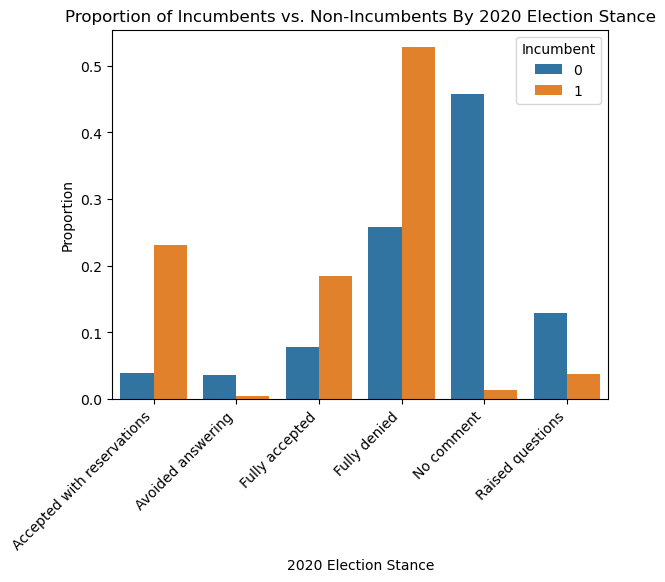

In [135]:
sns.barplot(data = incumbents, x = '2020 Election Stance', y = 'Proportion', hue = 'Incumbent')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Incumbents vs. Non-Incumbents By 2020 Election Stance');

In [118]:
winners = election_eda('Final Outcome')
winners

,2020 Election Stance,Final Outcome,Count,Proportion
0,Accepted with reservations,0,38,0.034111
1,Accepted with reservations,1,66,0.136082
2,Avoided answering,0,37,0.033214
3,Avoided answering,1,15,0.030928
4,Fully accepted,0,92,0.082585
5,Fully accepted,1,57,0.117526
6,Fully denied,0,290,0.260323
7,Fully denied,1,181,0.373196
8,No comment,0,524,0.470377
9,No comment,1,112,0.230928


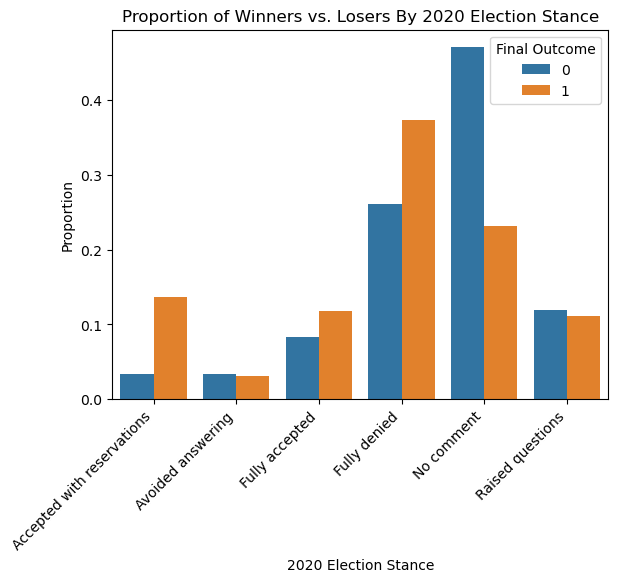

In [119]:
sns.barplot(data = winners, x = '2020 Election Stance', y = 'Proportion', hue = 'Final Outcome')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Winners vs. Losers By 2020 Election Stance');

In [121]:
gender = election_eda('Gender')
gender

,2020 Election Stance,Gender,Count,Proportion
0,Accepted with reservations,0,87,0.068993
1,Accepted with reservations,1,17,0.050296
2,Avoided answering,0,42,0.033307
3,Avoided answering,1,10,0.029586
4,Fully accepted,0,118,0.093577
5,Fully accepted,1,31,0.091716
6,Fully denied,0,363,0.287867
7,Fully denied,1,108,0.319527
8,No comment,0,511,0.405234
9,No comment,1,125,0.369822


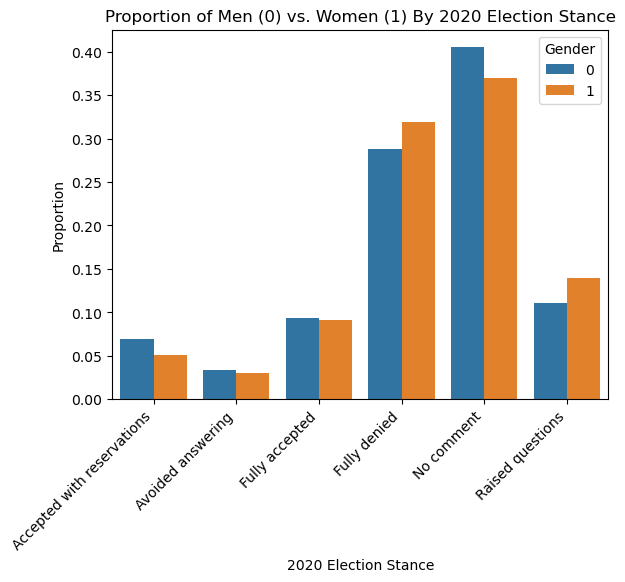

In [123]:
sns.barplot(data = gender, x = '2020 Election Stance', y = 'Proportion', hue = 'Gender')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Proportion of Men (0) vs. Women (1) By 2020 Election Stance');

# Hypothesis Tests

## TVD Hypothesis Tests

In [124]:
def calculate_tvd(label, df = reps):
    grouped = pd.melt(pd.pivot_table(data = df, 
                           values = 'Candidate', 
                           index = label, 
                           columns = '2020 Election Stance', 
                           aggfunc = 'count', 
                           fill_value = 0) \
            .reset_index(), id_vars = [label]).rename(columns = {'value': 'Count'})
    
    def density(row):
        if row[label] == 0:
            return row['Count'] / np.count_nonzero(df[label] == 0)
        elif row[label] == 1:
            return row['Count'] / np.count_nonzero(df[label] == 1)
        
    grouped['Proportion'] = grouped.apply(density, axis = 1)
    zeros_distribution = np.array(grouped[grouped[label] == 0]['Proportion'])
    ones_distribution = np.array(grouped[grouped[label] == 1]['Proportion'])
    tvd = sum(np.abs(zeros_distribution - ones_distribution)) / 2
    return tvd

In [125]:
incumbent_observed = calculate_tvd('Incumbent')
incumbent_observed

0.5684502289708363

In [126]:
winner_observed = calculate_tvd('Final Outcome')
winner_observed

0.24978437505783926

In [128]:
gender_observed = calculate_tvd('Gender')
gender_observed

0.05969011163301412

In [141]:
def tvd_ab_tests(label, df = reps):
    shuffled_label = 'Shuffled' + ' ' + 'Label'
    df[shuffled_label] = reps[label].sample(frac = 1, replace = False).values
    return calculate_tvd(shuffled_label, df)

In [142]:
np.random.seed(7)
incumbent_tvds = np.array([])
winner_tvds = np.array([])
gender_tvds = np.array([])
for i in np.arange(10000):
    incumbent_tvds = np.append(incumbent_tvds, tvd_ab_tests('Incumbent'))
    winner_tvds = np.append(winner_tvds, tvd_ab_tests('Final Outcome'))
    gender_tvds = np.append(gender_tvds, tvd_ab_tests('Gender'))

p-val: 0.0


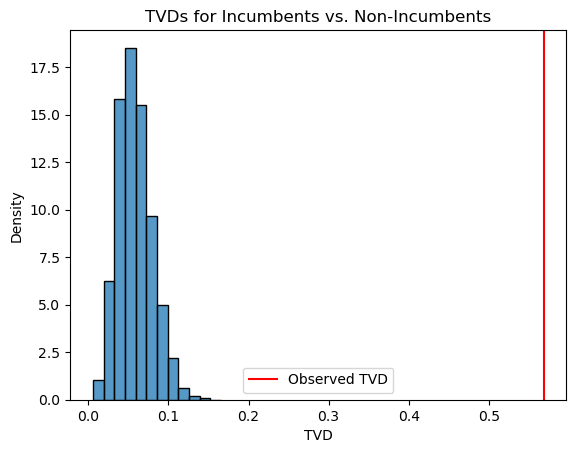

In [143]:
print('p-val: 0.0')
sns.histplot(incumbent_tvds, stat = 'density', bins = 12)
plt.axvline(incumbent_observed, color = 'red', label = 'Observed TVD')
plt.title('TVDs for Incumbents vs. Non-Incumbents')
plt.xlabel('TVD')
plt.legend();

p-val: 0.0


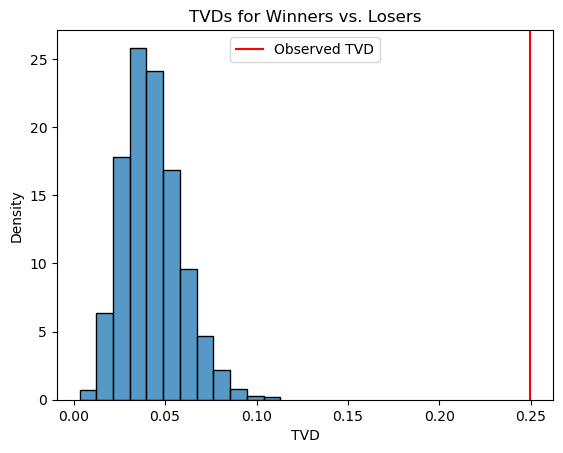

In [144]:
print('p-val: 0.0')
sns.histplot(winner_tvds, stat = 'density', bins = 12)
plt.axvline(winner_observed, color = 'red', label = 'Observed TVD')
plt.title('TVDs for Winners vs. Losers')
plt.xlabel('TVD')
plt.legend();

p-val: 0.25


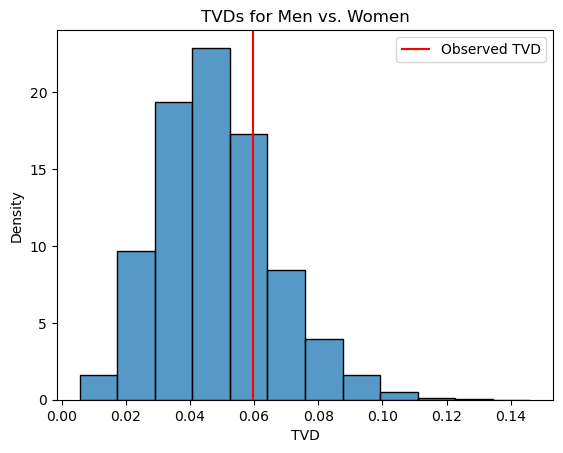

In [149]:
print('p-val: ' + str(np.round(np.count_nonzero(gender_tvds >= gender_observed) / len(gender_tvds), 2)))
sns.histplot(gender_tvds, stat = 'density', bins = 12)
plt.axvline(gender_observed, color = 'red', label = 'Observed TVD')
plt.title('TVDs for Men vs. Women')
plt.xlabel('TVD')
plt.legend();

## "Fully Denied" Hypothesis Tests

In [175]:
dummy = reps.copy()
dummy['shuffled'] = dummy['Gender'].sample(frac = 1, replace = False).values
grouped = dummy.groupby('shuffled').agg({'2020 Election Stance': lambda arr: np.mean(arr == 'Fully denied')})
#grouped = grouped[grouped['2020 Election Stance'] == 'Fully denied']
grouped
#pd.DataFrame(dummy[['shuffled', '2020 Election Stance']].groupby('shuffled'))

,2020 Election Stance
shuffled,
0,0.287867
1,0.319527


In [179]:
def proportion_ab_test(df, ab_col, direction):
    def obs_stat(df, ab_col, direction = direction):   
        grouped = df.groupby(ab_col).agg({'2020 Election Stance': 
                                              lambda arr: np.mean(arr == 'Fully denied')}).rename(columns = {'2020 Election Stance': 'Fully denied'})
        proportions = grouped['Fully denied'].values
        
        if direction == '0>1':
            return proportions[0] - proportions[1]
        elif direction == '0<1':
            return proportions[1] - proportions[0]
        else:
            return np.abs(proportions[0] - proportions[1])
        
    obs_diff = obs_stat(df, ab_col)
    
    diffs = np.zeros(10000)
    for i in np.arange(10000):
        df['shuffled'] = reps[ab_col].sample(frac = 1, replace = False).values
        diffs[i] = obs_stat(df, 'shuffled')
    
    pval = np.mean(diffs >= obs_diff)
    
    return {'diffs': diffs, 'obs': obs_diff, 'pval': pval}

In [186]:
winner_diffs = proportion_ab_test(reps, 'Final Outcome', '1>0')

p-val: 0.0


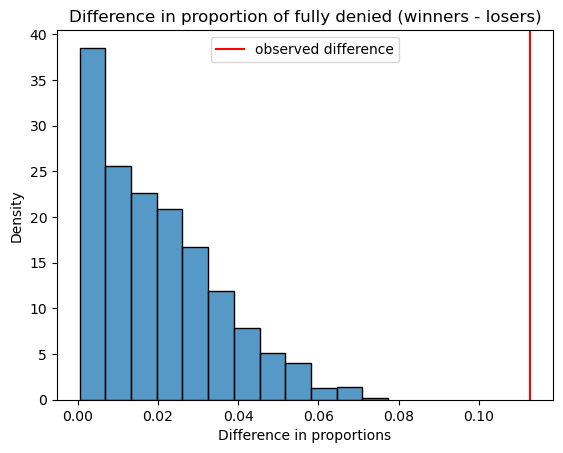

In [191]:
sns.histplot(winner_diffs['diffs'], bins=12, stat='density')
plt.title('Difference in proportion of fully denied (winners - losers)')
plt.xlabel('Difference in proportions')
plt.axvline(winner_diffs['obs'], color='red', label = 'observed difference')
plt.legend();
print('p-val:', winner_diffs['pval'])

In [189]:
incumbent_diffs = proportion_ab_test(reps, 'Incumbent', '1>0')

p-val: 0.0


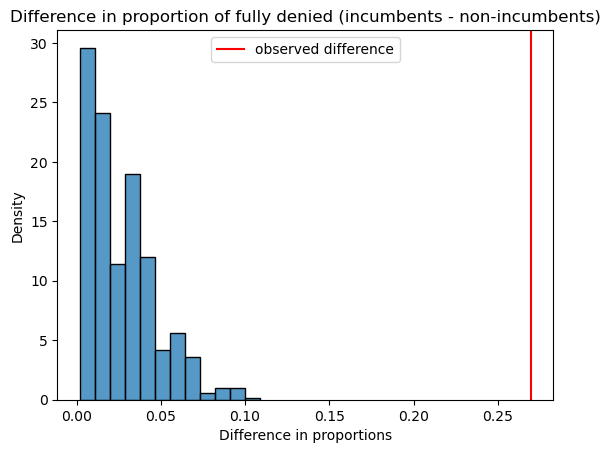

In [192]:
sns.histplot(incumbent_diffs['diffs'], bins=12, stat='density')
plt.title('Difference in proportion of fully denied (incumbents - non-incumbents)')
plt.xlabel('Difference in proportions')
plt.axvline(incumbent_diffs['obs'], color='red', label = 'observed difference')
plt.legend();
print('p-val:', incumbent_diffs['pval'])

In [180]:
gender_diffs = proportion_ab_test(reps, 'Gender', '1>0')

p-val: 0.301


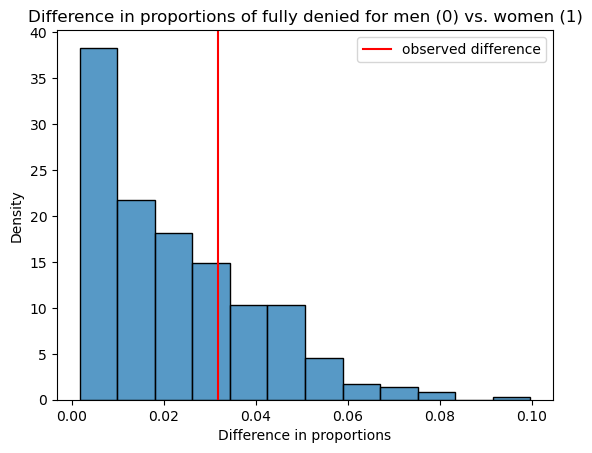

In [193]:
sns.histplot(gender_diffs['diffs'], bins=12, stat='density')
plt.title('Difference in proportions of fully denied for men (0) vs. women (1)')
plt.xlabel('Difference in proportions')
plt.axvline(gender_diffs['obs'], color='red', label = 'observed difference')
plt.legend();
print('p-val:', gender_diffs['pval'])

# Data Overview for ACS

In [58]:
pd.read_csv('data/acsreal.csv')

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,5001600US0101,"Congressional District 1 (116th Congress), Ala...",714379,675,343775,652,370604,618,92.8,0.3,...,0.2,(X),(X),543673,(X),47.3,0.1,52.7,0.1,NaN
2,5001600US0102,"Congressional District 2 (116th Congress), Ala...",678978,2797,329253,1591,349725,1933,94.1,0.6,...,0.2,(X),(X),517299,(X),47.6,0.2,52.4,0.2,NaN
3,5001600US0103,"Congressional District 3 (116th Congress), Ala...",713404,2206,345801,1066,367603,1608,94.1,0.4,...,0.2,(X),(X),544771,(X),47.7,0.1,52.3,0.1,NaN
4,5001600US0104,"Congressional District 4 (116th Congress), Ala...",687640,2226,337291,1513,350349,1203,96.3,0.4,...,0.1,(X),(X),514673,(X),48.3,0.1,51.7,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,5001600US5506,"Congressional District 6 (116th Congress), Wis...",714867,851,360854,621,354013,775,101.9,0.3,...,0.1,(X),(X),552944,(X),50.2,0.1,49.8,0.1,NaN
877,5001600US5507,"Congressional District 7 (116th Congress), Wis...",711161,857,358615,658,352546,699,101.7,0.3,...,0.1,(X),(X),551943,(X),50.2,0.1,49.8,0.1,NaN
878,5001600US5508,"Congressional District 8 (116th Congress), Wis...",733446,367,366560,311,366886,347,99.9,0.1,...,0.1,(X),(X),554881,(X),49.6,0.1,50.4,0.1,NaN
879,5001600US5600,Congressional District (at Large) (116th Congr...,581348,*****,296280,695,285068,695,103.9,0.5,...,0.1,(X),(X),435357,(X),50.9,0.1,49.1,0.1,NaN


In [47]:
demo = pd.read_csv('data/acsreal.csv')
demo.columns = demo.loc[0]
demo = demo.drop(0)
demo['Total'] = np.int64(demo['Estimate!!SEX AND AGE!!Total population']) 
demo['White'] = np.int64(demo['Estimate!!RACE!!Total population!!One race!!White'])
demo['White %'] = demo['White'] / demo['Total'] * 100
demo = demo[demo['Geographic Area Name'].str.contains('not defined')==False]
demo = demo[demo['Geographic Area Name'].str.contains('Delegate District')==False]
demo = demo[demo['Geographic Area Name'].str.contains('Resident Commissioner') == False]
demo = demo[['Geographic Area Name', 'White %']]
demo = demo.groupby('Geographic Area Name', sort=False).mean().reset_index()
demo

,Geographic Area Name,White %
0,"Congressional District 1 (116th Congress), Ala...",66.716407
1,"Congressional District 2 (116th Congress), Ala...",63.182901
2,"Congressional District 3 (116th Congress), Ala...",68.713660
3,"Congressional District 4 (116th Congress), Ala...",86.548485
4,"Congressional District 5 (116th Congress), Ala...",74.747328
...,...,...
430,"Congressional District 5 (116th Congress), Wis...",89.477084
431,"Congressional District 6 (116th Congress), Wis...",91.411549
432,"Congressional District 7 (116th Congress), Wis...",92.602660
433,"Congressional District 8 (116th Congress), Wis...",88.763590


In [48]:
census = pd.read_csv('data/censusdata.csv')
census = census.iloc[[0, 2], :]
census = census.drop(columns = ['Label (Grouping)'])
census = census.dropna()
census

,"Congressional District 1 (116th Congress), Alabama","Congressional District 2 (116th Congress), Alabama","Congressional District 3 (116th Congress), Alabama","Congressional District 4 (116th Congress), Alabama","Congressional District 5 (116th Congress), Alabama","Congressional District 6 (116th Congress), Alabama","Congressional District 7 (116th Congress), Alabama","Congressional District (at Large) (116th Congress), Alaska","Congressional District 1 (116th Congress), Arizona","Congressional District 2 (116th Congress), Arizona",...,"Congressional District 1 (116th Congress), Wisconsin","Congressional District 2 (116th Congress), Wisconsin","Congressional District 3 (116th Congress), Wisconsin","Congressional District 4 (116th Congress), Wisconsin","Congressional District 5 (116th Congress), Wisconsin","Congressional District 6 (116th Congress), Wisconsin","Congressional District 7 (116th Congress), Wisconsin","Congressional District 8 (116th Congress), Wisconsin","Congressional District (at Large) (116th Congress), Wyoming","Resident Commissioner District (at Large) (116th Congress), Puerto Rico"
0,"726,276","693,466","735,132","702,982","761,102","740,710","664,611","733,391","760,850","744,478",...,"727,452","789,393","733,584","695,395","735,571","727,774","732,582","751,967","576,851","3,285,874"
2,"466,838","417,828","481,097","573,800","531,906","537,648","211,335","435,392","420,068","497,799",...,"581,269","631,380","660,731","296,684","629,462","636,580","661,025","640,414","488,374","560,592"


In [49]:
census_demos = census.iloc[1].str.replace(',', '').astype(float) / census.iloc[0].str.replace(',', '').astype(float) * 100

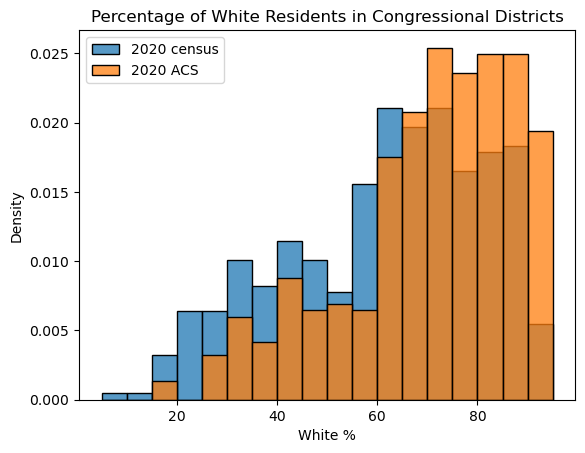

In [54]:
sns.histplot(census_demos, label = '2020 census', stat = 'density', bins=np.arange(5, 100, 5))
sns.histplot(demo['White %'], label = '2020 ACS', stat = 'density', bins=np.arange(5, 100, 5))
plt.legend()
plt.title('Percentage of White Residents in Congressional Districts');